# **1.Implement logistic regression on a dataset of your choice and visualize it.**

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

data = pd.read_csv("/content/titanic.csv")

data.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)

# Handle missing values
data["Age"].fillna(data["Age"].median(), inplace=True)
data["Embarked"].fillna(data["Embarked"].mode()[0], inplace=True)

# Convert categorical variables to numeric
data["Sex"] = LabelEncoder().fit_transform(data["Sex"])  # male=1, female=0
data["Embarked"] = LabelEncoder().fit_transform(data["Embarked"])  # C=0, Q=1, S=2

# Separate features and target variable
X = data.drop(columns=["Survived"])
y = data["Survived"]

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression Model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Make predictions
predictions = logistic_model.predict(X_test)

# Calculate model accuracy
model_accuracy = accuracy_score(y_test, predictions)
print(f"Logistic Regression Model Accuracy: {model_accuracy:.4f}")



Logistic Regression Model Accuracy: 0.8045


<ipython-input-11-335de3ee8c10>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Age"].fillna(data["Age"].median(), inplace=True)
<ipython-input-11-335de3ee8c10>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

# **2. Develop the cost function to determine gradient descent for logistic regression.**

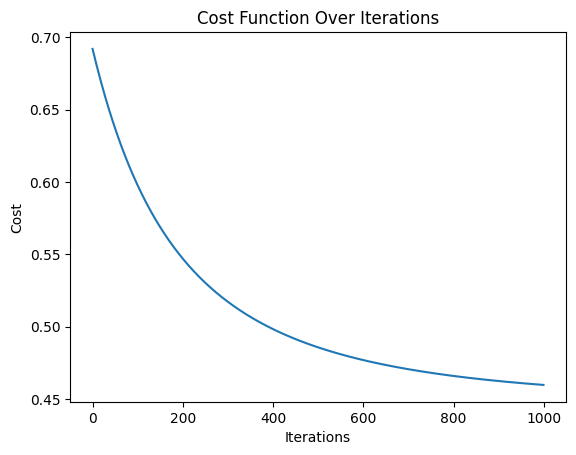

In [12]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []
    for i in range(iterations):
        gradient = (1/m) * X.T @ (sigmoid(X @ theta) - y)
        theta -= alpha * gradient
        cost_history.append(compute_cost(X, y, theta))
    return theta, cost_history

X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Reshape y_train and y_test for correct computation
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

# Initialize theta
theta = np.zeros((X_train.shape[1], 1))
alpha = 0.01
iterations = 1000

# Perform gradient descent
theta, cost_history = gradient_descent(X_train, y_train, theta, alpha, iterations)

# Plot cost function over iterations
plt.plot(range(iterations), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function Over Iterations")
plt.show()



# **3. Generate a confusion matrix and heatmap. Compute performance metrics for your model.**

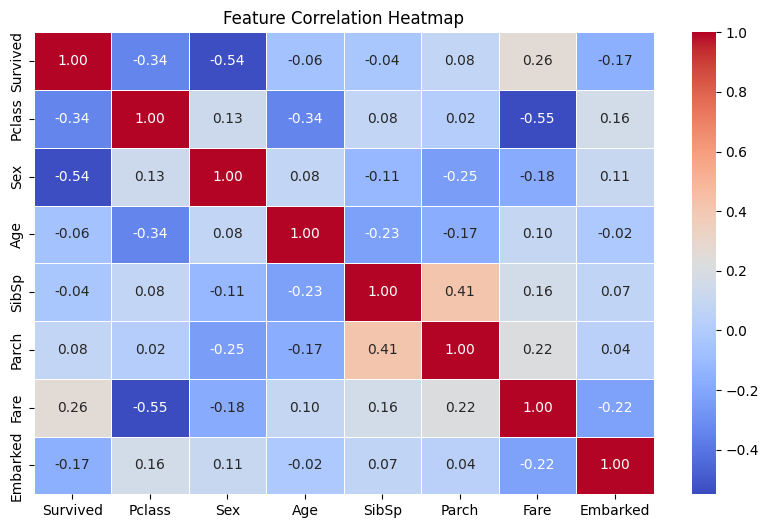

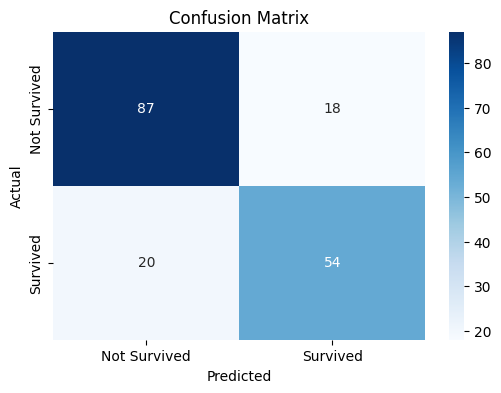

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       105
           1       0.75      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [14]:
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions
y_pred_probs = sigmoid(X_test @ theta)
y_pred = (y_pred_probs >= 0.5).astype(int)

# Heatmap - Correlation Between Features
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))
